<a href="https://colab.research.google.com/github/anjaleeDS/DataVizStanford/blob/master/DoordashPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

every nth line of excel

`=OFFSET(Sheet1!$A$1,(ROW()-1)*3,0)`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
import altair as alt
import datetime as dt
import numpy as np

from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/My\ Drive/
%cd Colab\ Notebooks
%cd Doordash\ Predictions


pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive
/gdrive/My Drive/Colab Notebooks
/gdrive/My Drive/Colab Notebooks/Doordash Predictions


#Get data/ See data

In [0]:
spent_df = pd.read_csv('CCActivity20182020.csv') #from march 2018-current
orders_df = pd.read_csv('DoorDashHistoryCSV.csv', header=None) #from jun 2018-current, set header to none
# orders_df

In [0]:
o_df = pd.DataFrame({'restaurant':orders_df[0].iloc[::3].values,
                     'datebill':orders_df[0].iloc[1::3].values,
                    'items':orders_df[0].iloc[2::3].values})
o_df.head(5)

In [0]:
o_df['bill'] = o_df['datebill'].str.extract('(\d\d\.\d\d)', expand=True)
o_df['bill'] = o_df['bill'].astype('float')

o_df['date'] = o_df['datebill'].str.extract('(\w\w\w\s\d*\w\w\s\d*\,\s\d*:\d\d\w\w)', expand=True)
o_df['date'] = pd.to_datetime(o_df['date'])
# o_df['dt'] = o_df['dt'].fillna(0)

o_df['items'] = o_df['items'].str.split(pat=r",\ ", expand=False)
o_df.head(5)

In [264]:
o_df['hr'] = o_df['date'].dt.hour
o_df['dow'] = o_df['date'].dt.dayofweek
o_df['dow'].unique()

array([ 6.,  4., nan,  3.,  2.,  0.,  1.,  5.])

In [0]:
o_df.dtypes
o_df.bfill(axis='rows') # fill the NaNs


In [0]:
#  === WHERE DID I ORDER THE MOST (ALTAIR ed) #######################################

alt.Chart(o_df).mark_bar().encode(
    alt.Y('restaurant:N', sort="-x", axis=alt.Axis(title='Restaurants')),
    alt.X('count(restaurant):Q', axis=alt.Axis(title='# of Times Ordered', orient='top')),
    color='year(date)',
    tooltip=('sum(bill)')
).interactive() 

In [0]:

#### ==== behavior per month? #####

alt.Chart(o_df).mark_bar().encode(
    x = alt.X('month(date)',axis=alt.Axis(title='Month (years are collapsed)')),
    y = alt.Y('bill',axis=alt.Axis(title='$$$')),
    shape='year(date):O',
    color='year(date):O',
    tooltip=('restaurant','mean(bill)','date','items')
).transform_bin(
    'binned_count', field='date'
).interactive()


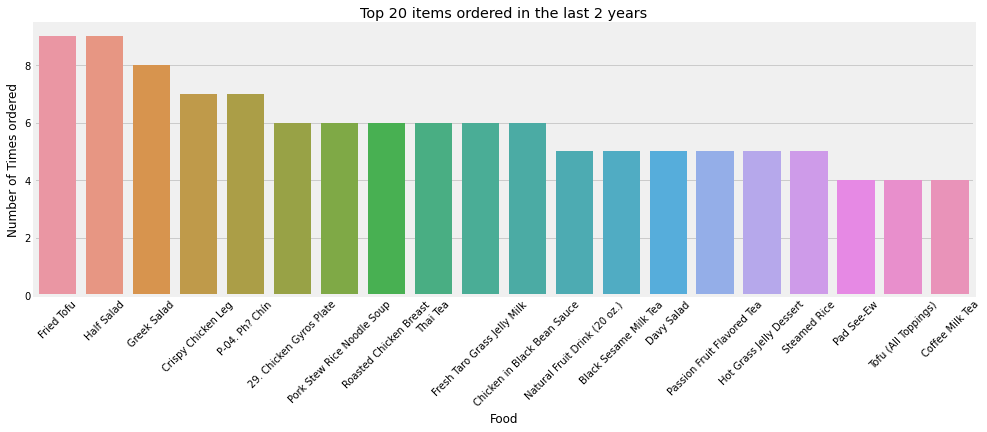

In [60]:
# =====WHAT DID I ORDER THE MOST (SNS ed) #######################################
food_items =+ o_df['items']

####################################
# OMG THIS LAMBDA FUNCTION IS BOMB #
####################################
food_list = [item for sublist in food_items for item in sublist]

(unique, counts) = np.unique(food_list, return_counts=True)
frequencies = pd.DataFrame(np.asarray((unique, counts)).T)
f_sorted = frequencies.sort_values(by=[1], ascending=False)

for_bar = f_sorted.head(20)

plt.figure(figsize=(15,5))
barchart = sns.barplot(data=for_bar, 
            x=0, y=1,)
barchart.set_xticklabels(barchart.get_xticklabels(),rotation=45)
barchart.set(xlabel='Food', ylabel='Number of Times ordered', title="Top 20 items ordered in the last 2 years")
plt.show()

## Boring. need to break up words into nouns and preparation

In [267]:
alt.Chart(o_df).mark_bar().encode(
    x='year(date)',
    y='sum(bill):Q',
    tooltip=('restaurant')
).interactive()

alt.Chart(...)

In [0]:
# o_df['dt'] = o_df['dt'].astype(str).replace('NaT','')
# o_df['sec'] = o_df['dt'].dt.total_seconds()
# pd.set_option('max_rows', 20)
# pd.set_option('max_colwidth', 400)

# o_df.loc[o_df['date']>'2018']
o_df.bfill(axis='rows')

In [170]:
## Number of times ordered per month

alt.Chart(o_df).mark_bar().encode(
  alt.X('day(date)', bin=True),
  y = 'count()',
  tooltip=('restaurant','mean(bill)','date','items')
).interactive()

alt.Chart(...)

In [0]:
o_df['date']

In [123]:
base = alt.Chart(o_df).mark_circle(opacity=0.5).transform_fold(
    fold=['0', '1', '2', '3', '4','5','6'],
    as_=['whatever', 'wahtever']
).encode(
    alt.X('year(date):O'),
    alt.Y('mean(bill):Q'),
    alt.Color('dow:N'),
    tooltip=('restaurant','mean(bill)','date','items')

)

base + base.transform_loess('date', 'bill', groupby=['dow']).mark_line(size=4)


alt.LayerChart(...)

In [0]:
alt.Chart(o_df).mark_circle().encode(
    x ='mean(bill):Q',
    y =alt.Y('restaurant:N', sort='-x'),
    size='count()',
    tooltip=('restaurant','mean(bill)','count()')
).transform_bin(
    'binned_count', field='bill'
).interactive()

In [0]:
rest_list = o_df.restaurant.unique()

# o_df.bill('float').dtypes
# o_df.bill
# o_df['bill'] = o_df['bill'].astype('float')

# o_df.dtypes
rest_list = rest_list.astype(list)
o_df.dow.unique

#Prediction stuff

1. what's the spend like every month?
2. what's the likelihood that i'll order particular restaurant on a particular day?



In [0]:
pdf = o_df[['date','bill']]
# pdf.set_index('date').plot()

# rename the columns to match FBs Prophet's FIT function
pdf.rename(columns={"date": "ds", "bill":"y"}, inplace=True)

# group the bill to be monthly
per = pdf.ds.dt.to_period("M") 
g = pdf.groupby(per)
roll_month = g.sum()
# roll_month

In [262]:
from datetime import datetime, timedelta

month_bill_data = roll_month.reset_index()

month_bill_data['ds'].dt.year
# month_bill_data.dtypes

0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2019
8     2019
9     2019
10    2019
11    2019
12    2019
13    2019
14    2019
15    2019
16    2019
17    2019
18    2019
19    2020
20    2020
21    2020
22    2020
23    2020
Name: ds, dtype: int64

In [253]:
my_model = Prophet(interval_width=0.95)
my_model.fit(month_bill_data)

TypeError: ignored

In [0]:
predict_by_month

month_bill_data

```
ds	y
0	2018-06	374.50
1	2018-07	233.20
2	2018-08	435.42
3	2018-09	244.20
4	2018-10	324.88
5	2018-11	448.03
6	2018-12	310.50
7	2019-01	228.98
8	2019-02	267.17
9	2019-03	409.84
10	2019-04	242.48
11	2019-05	322.56
12	2019-06	469.28
13	2019-07	100.12
14	2019-08	293.58
15	2019-09	241.41
16	2019-10	441.61
17	2019-11	232.07
18	2019-12	324.14
19	2020-01	415.68
20	2020-02	499.03
21	2020-03	24.79
22	2020-04	204.97
23	2020-05	307.18
```



#MAPS STUFF

In [0]:
import folium
from folium import 